# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import sys
sys.path.append('../../')
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = '../yaml/control_cmaq.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-02-12:00:00',
  'end_time': '2019-08-03-12:00:00',
  'output_dir': '/scratch2/BMC/rcm1/rhs/wrfchem/processed/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/0802',
  'debug': True},
 'model': {'cmaq_expt': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf',
   'files_vert': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro3d.ncf',
   'files_surf': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro2d.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO2': 'NO2',
     'NO': 'NO',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}},
  'rrfs_13km': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/rrfs-cmaq/r131_v1/0802/dynf*.nc',
   'mod_type': 'rrfs',
   'mod_kwargs': {'mech': '

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_expt
{'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf', 'files_vert': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro3d.ncf', 'files_surf': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro2d.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'CO': 'CO', 'NO2': 'NO2', 'NO': 'NO', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Complete

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

In [ ]:
an.models

In [ ]:
an.models['cmaq_expt'].obj

In [ ]:
an.models['rrfs_13km'].obj

In [ ]:
#an.models['rrfs_25km'].obj
#an.models['rrfs_25km'].obj.isel(z=0).expand_dims('z',axis=1)

In [ ]:
an.models['wrfchem_v4.2'].obj
#All the info in the model class can be called here.
#print(an.models['cmaq_oper'].label)
#print(an.models['cmaq_oper'].mapping)

In [ ]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [ ]:
an.open_obs()

In [ ]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

In [ ]:
#This just pairs the data
an.pair_data()

In [ ]:
#And this generates all the plots.
an.plotting()

In [ ]:
an.stats()

In [5]:
import monet 
import monetio 
import numpy as np

#Open the file
firex_data = '/scratch2/BMC/rcm1/rhs/obs/firex_20201209/merge_1s/firexaq-mrg01-dc8_merge_20190802_RL.ict'
ds=monetio.icartt.add_data(firex_data)

In [6]:
# rename latitude, longitude, and altitude
#Convert pressure into pa so similar to the model
df = ds.rename({'Latitude_YANG':'latitude',
                'Longitude_YANG':'longitude',
                'P_BUI':'pressure_obs'}).to_dataframe() #'time':'time_obs'

#Fill LLOD with 0 and ULOD with NaN and convert pressure units just once 
df['pressure_obs'] = df['pressure_obs']*100
df = df.replace(-777777,np.NaN)
df = df.replace(-888888,0.0)

#Resample the data
df = df.resample('360S').mean() #6 min so doesn't error

In [7]:
df_obs = df[['latitude','longitude','pressure_obs','O3_CL_RYERSON','NO_CL_RYERSON',
            'NO2_CL_RYERSON','CO_LGR_ppb_PEISCHL']]

In [8]:
# do the facy trick to convert to get something useful for MONET
# this converts to dimensions of x and y
# you may want to make pressure / msl a coordinate too
new_ds = df.rename_axis('time_obs').reset_index().monet._df_to_da().set_coords(['time_obs','pressure_obs'])


In [9]:
new_ds

<xarray.Dataset>
Dimensions:                                       (x: 62, y: 1)
Coordinates:
  * x                                             (x) int64 0 1 2 3 ... 59 60 61
    time_obs                                      (y, x) datetime64[ns] 2019-...
    latitude                                      (y, x) float64 43.64 ... 43.55
    longitude                                     (y, x) float64 -116.3 ... -...
    pressure_obs                                  (y, x) float64 8.449e+04 .....
Dimensions without coordinates: y
Data variables: (12/628)
    Time_Stop                                     (y, x) float64 7.622e+04 .....
    Day_Of_Year_YANG                              (y, x) float64 214.0 ... 214.0
    MSL_GPS_Altitude_YANG                         (y, x) float64 1.561e+03 .....
    HAE_GPS_Altitude_YANG                         (y, x) float64 1.541e+03 .....
    Pressure_Altitude_YANG                        (y, x) float64 4.877e+03 .....
    Radar_Altitude_YANG                           (y, x) float64 2.391e+03 .....
    ...                                            ...
    smoke_age_HOLMES                              (y, x) float64 nan nan ... nan
    smoke_age_corr_HOLMES                         (y, x) float64 nan nan ... nan
    smoke_age_rise_HOLMES                         (y, x) float64 nan nan ... nan
    smoke_rise_HOLMES                             (y, x) float64 nan nan ... nan
    fire_distance_HOLMES                          (y, x) float64 nan nan ... nan
    smoke_agemethod_HOLMES                        (y, x) float64 nan nan ... nan

In [10]:
df['pressure_obs']

time
2019-08-02 21:06:00    84490.646146
2019-08-02 21:12:00    63377.423500
2019-08-02 21:18:00    52614.735417
2019-08-02 21:24:00    40385.804417
2019-08-02 21:30:00    31784.257556
                           ...     
2019-08-03 02:48:00    24041.540278
2019-08-03 02:54:00    36523.218333
2019-08-03 03:00:00    59599.291667
2019-08-03 03:06:00    75832.645000
2019-08-03 03:12:00    90199.275439
Freq: 360S, Name: pressure_obs, Length: 62, dtype: float64

In [11]:
#Nearest neighbor approach to find closest grid cell to each point.
ds_wrf = monet.util.combinetool.combine_da_to_da(an.models['wrfchem_v4.2'].obj,new_ds,merge=False)
ds_wrf = ds_wrf.interp(time=ds_wrf.time_obs.squeeze())
ds_wrf

<xarray.Dataset>
Dimensions:        (x: 62, y: 1, z: 50)
Coordinates:
    longitude      (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs   (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude       (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time           (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:1...
  * x              (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs       (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:1...
Dimensions without coordinates: y, z
Data variables:
    no             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    o3             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    co             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    no2            (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    pres_pa_mid    (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    alt_msl_m_mid  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    temperature_k  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    alt_agl_m_mid  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    surfpres_pa    (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [12]:
ds_cmaq = monet.util.combinetool.combine_da_to_da(an.models['cmaq_expt'].obj,new_ds,merge=False)
ds_cmaq = ds_cmaq.interp(time=ds_cmaq.time_obs.squeeze())
ds_cmaq

<xarray.Dataset>
Dimensions:         (x: 62, y: 1, z: 35)
Coordinates:
    longitude       (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs    (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude        (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time            (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
  * x               (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs        (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
Dimensions without coordinates: y, z
Data variables: (12/178)
    O3              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    CO              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    SO2             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO2             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO3             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    ...              ...
    VD_HONO         (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_CO           (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_METHANOL     (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_N2O5         (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_NO3          (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_GEN_ALD      (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
Attributes: (12/34)
    IOAPI_VERSION:  $Id:: init3.F 29 2014-08-07 14:31:02Z coats              ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019215
    CTIME:          233544
    WDATE:          2019215
    ...             ...
    GDNAM:          AQF_CONUS_5x    
    UPNAM:          OPCONC          
    VAR-LIST:       O3              CO              SO2             NO       ...
    FILEDESC:       Concentration file output                                ...
    HISTORY:        
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [13]:
ds_rrfs = monet.util.combinetool.combine_da_to_da(an.models['rrfs_13km'].obj,new_ds,merge=False)
ds_rrfs = ds_rrfs.interp(time=ds_rrfs.time_obs.squeeze())
ds_rrfs

<xarray.Dataset>
Dimensions:         (x: 62, y: 1, z: 64)
Coordinates:
    longitude       (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs    (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude        (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time            (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
  * x               (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs        (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
Dimensions without coordinates: y, z
Data variables:
    no              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    o3              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    co              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    no2             (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    temperature_k   (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    surfpres_pa     (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    dp_pa           (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    surfalt_m       (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    dz_m            (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    pres_pa_mid     (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    alt_msl_m_full  (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           393
    ny:           225
    lon1:         -121.70231097
    lat1:         22.57417972
    dx:           13000.0
    dy:           13000.0

In [14]:
def resample_stratify(da, levels, vertical, axis=1,interpolation='linear',extrapolation='nan'):
    import stratify
    import xarray as xr

    result = stratify.interpolate(levels, vertical.chunk(), da.chunk(), axis=axis,
                                 interpolation = interpolation,extrapolation = extrapolation)
    dims = da.dims
    out = xr.DataArray(result, dims=dims)
    for i in dims:
        if i != "z":
            out[i] = da[i]
    out.attrs = da.attrs.copy()
    if len(da.coords) > 0:
        for i in da.coords:
            if i != "z":
                out.coords[i] = da.coords[i]
    return out

In [15]:
def vert_interp(ds_model,df_obs,var_name_list = ['o3','pres_pa_mid']):
    import xarray as xr
    from pandas import merge_asof, Series
    
    var_out_list = []
    for var_name in var_name_list:
        if var_name == 'pres_pa_mid':
            out = resample_stratify(ds_model[var_name],sorted(ds_model.pressure_obs.squeeze().values,reverse=True),
                                      ds_model['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
            #Use extrapolation nan for the pressure so that later you can assign the nan values to the pressure_obs value 
            #instead of the midpoint of the edge model cells. This is needed for the pairing later on.
        else:
            out = resample_stratify(ds_model[var_name],sorted(ds_model.pressure_obs.squeeze().values,reverse=True),
                                  ds_model['pres_pa_mid'],axis=1,
                                  interpolation='linear',extrapolation='nearest')
        out.name = var_name
        var_out_list.append(out)

    df_model = xr.merge(var_out_list).to_dataframe().reset_index()
    df_model.pres_pa_mid.fillna(df_model.pressure_obs,inplace=True)
    df_model.drop(labels=['x','y','z','pressure_obs','time_obs'], axis=1, inplace=True)
    df_model.rename(columns={'pres_pa_mid':'pressure_obs'}, inplace=True)
    
    final_df_model = merge_asof(df_obs, df_model, 
                            by=['latitude', 'longitude', 'pressure_obs'], 
                            on='time', direction='nearest')

    return final_df_model

In [16]:
ds_wrf['pres_pa_mid'].values.max()

[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s


92796.2140625

In [17]:
var_name_list = ['o3','no','no2','co','pres_pa_mid']
df_wrf = vert_interp(ds_wrf,df_obs,var_name_list)
df_wrf

[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100

,latitude,longitude,pressure_obs,time,O3_CL_RYERSON,NO_CL_RYERSON,NO2_CL_RYERSON,CO_LGR_ppb_PEISCHL,o3,no,no2,co
0,43.640390,-116.293116,84490.646146,2019-08-02 21:06:00,60.723620,NaN,NaN,115.282663,49.308003,0.168585,0.611047,122.411118
1,43.985582,-116.193801,63377.423500,2019-08-02 21:12:00,56.731250,NaN,-0.366561,87.677500,49.206406,0.005222,0.010001,94.669584
2,44.559467,-116.069573,52614.735417,2019-08-02 21:18:00,60.773869,NaN,-0.357817,82.680139,51.896556,0.002917,0.004013,88.033664
3,45.052128,-115.530464,40385.804417,2019-08-02 21:24:00,47.441092,NaN,-0.383823,69.373472,60.743113,0.022505,0.015970,78.496747
4,45.447756,-114.626168,31784.257556,2019-08-02 21:30:00,65.505881,NaN,-0.661536,81.278571,67.326464,0.059551,0.020539,80.310915
...,...,...,...,...,...,...,...,...,...,...,...,...
57,45.558078,-116.326276,24041.540278,2019-08-03 02:48:00,113.140531,NaN,0.173000,105.725000,124.281975,0.063996,0.091903,78.545405
58,44.812220,-116.275130,36523.218333,2019-08-03 02:54:00,85.714576,NaN,0.107912,103.884444,65.486143,0.016517,0.053528,79.614568
59,44.188918,-116.233925,59599.291667,2019-08-03 03:00:00,60.068540,NaN,0.057715,91.929167,49.184038,0.000529,0.008928,90.117718
60,43.703687,-116.188339,75832.645000,2019-08-03 03:06:00,51.903636,NaN,0.104435,101.068889,44.945128,0.001579,0.078718,101.426521


In [18]:
var_name_list = ['O3','NO','NO2','CO','pres_pa_mid']
df_cmaq = vert_interp(ds_cmaq,df_obs,var_name_list)
df_cmaq

[########################################] | 100% Completed |  6.9s
[########################################] | 100% Completed |  7.0s
[########################################] | 100% Completed |  7.1s
[########################################] | 100% Completed |  7.1s
[########################################] | 100% Completed | 11.7s
[########################################] | 100% Completed | 11.7s
[########################################] | 100% Completed | 11.8s
[########################################] | 100% Completed | 11.9s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  7.1s
[########################################] | 100% Completed |  7.1s
[########################################] | 100

,latitude,longitude,pressure_obs,time,O3_CL_RYERSON,NO_CL_RYERSON,NO2_CL_RYERSON,CO_LGR_ppb_PEISCHL,O3,NO,NO2,CO
0,43.640390,-116.293116,84490.646146,2019-08-02 21:06:00,60.723620,NaN,NaN,115.282663,51.038241,1.134034e-01,0.463313,102.286363
1,43.985582,-116.193801,63377.423500,2019-08-02 21:12:00,56.731250,NaN,-0.366561,87.677500,49.739345,1.092768e-02,0.030173,94.755061
2,44.559467,-116.069573,52614.735417,2019-08-02 21:18:00,60.773869,NaN,-0.357817,82.680139,49.093061,1.832826e-03,0.002719,87.793745
3,45.052128,-115.530464,40385.804417,2019-08-02 21:24:00,47.441092,NaN,-0.383823,69.373472,59.852425,1.641015e-03,0.001495,75.552378
4,45.447756,-114.626168,31784.257556,2019-08-02 21:30:00,65.505881,NaN,-0.661536,81.278571,78.527651,2.310971e-03,0.001099,69.205383
...,...,...,...,...,...,...,...,...,...,...,...,...
57,45.558078,-116.326276,24041.540278,2019-08-03 02:48:00,113.140531,NaN,0.173000,105.725000,96.539171,5.714657e-04,0.003349,64.809988
58,44.812220,-116.275130,36523.218333,2019-08-03 02:54:00,85.714576,NaN,0.107912,103.884444,76.887092,9.523416e-05,0.002001,66.412781
59,44.188918,-116.233925,59599.291667,2019-08-03 03:00:00,60.068540,NaN,0.057715,91.929167,50.135578,3.290869e-08,0.011992,78.779876
60,43.703687,-116.188339,75832.645000,2019-08-03 03:06:00,51.903636,NaN,0.104435,101.068889,45.302285,3.935480e-08,0.157325,87.828527


In [19]:
var_name_list = ['o3','no','no2','co','pres_pa_mid']
df_rrfs = vert_interp(ds_rrfs,df_obs,var_name_list)
df_rrfs

[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  4.5s
[########################################] | 100% Completed |  4.5s
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100

,latitude,longitude,pressure_obs,time,O3_CL_RYERSON,NO_CL_RYERSON,NO2_CL_RYERSON,CO_LGR_ppb_PEISCHL,o3,no,no2,co
0,43.640390,-116.293116,84490.646146,2019-08-02 21:06:00,60.723620,NaN,NaN,115.282663,57.390829,1.715747e-01,0.584214,170.033254
1,43.985582,-116.193801,63377.423500,2019-08-02 21:12:00,56.731250,NaN,-0.366561,87.677500,40.591861,3.101758e-03,0.005572,90.842528
2,44.559467,-116.069573,52614.735417,2019-08-02 21:18:00,60.773869,NaN,-0.357817,82.680139,45.873745,1.535953e-03,0.002144,80.768158
3,45.052128,-115.530464,40385.804417,2019-08-02 21:24:00,47.441092,NaN,-0.383823,69.373472,57.596892,9.710479e-04,0.000716,69.620032
4,45.447756,-114.626168,31784.257556,2019-08-02 21:30:00,65.505881,NaN,-0.661536,81.278571,62.006177,1.787913e-03,0.001166,74.153345
...,...,...,...,...,...,...,...,...,...,...,...,...
57,45.558078,-116.326276,24041.540278,2019-08-03 02:48:00,113.140531,NaN,0.173000,105.725000,95.042133,4.868373e-04,0.003549,64.754860
58,44.812220,-116.275130,36523.218333,2019-08-03 02:54:00,85.714576,NaN,0.107912,103.884444,77.598396,6.972934e-05,0.001849,66.439287
59,44.188918,-116.233925,59599.291667,2019-08-03 03:00:00,60.068540,NaN,0.057715,91.929167,49.417742,8.221137e-09,0.012356,83.961269
60,43.703687,-116.188339,75832.645000,2019-08-03 03:06:00,51.903636,NaN,0.104435,101.068889,41.636512,9.306164e-09,0.047523,96.847235


In [20]:
df_rrfs['pressure_obs_kpa'] = df_rrfs['pressure_obs']/1000. #Convert to kpa for plotting.
df_wrf['pressure_obs_kpa'] = df_wrf['pressure_obs']/1000. #Convert to kpa for plotting.
df_cmaq['pressure_obs_kpa'] = df_cmaq['pressure_obs']/1000. #Convert to kpa for plotting.

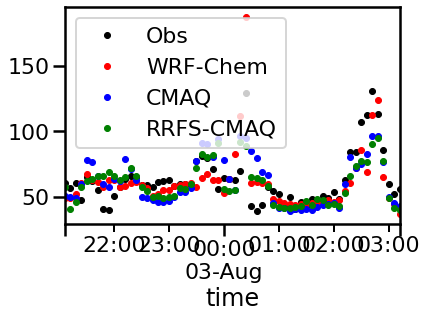

In [21]:
ax = df_wrf.plot(x='time',y='O3_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='o3',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='O3',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='o3',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)

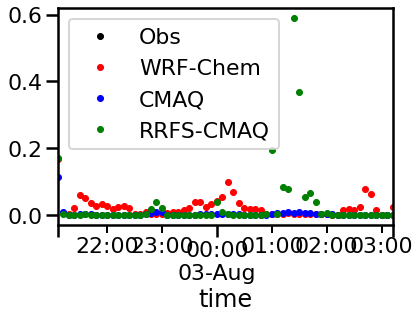

In [22]:
ax = df_wrf.plot(x='time',y='NO_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='no',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='NO',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='no',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
#This is all NAN so not very useful for the obs. Need to pick a diffent day. Or maybe switch to LIF instrument.
#NO_LIF_ROLLINS,  pptv

(0.0, 1.0)

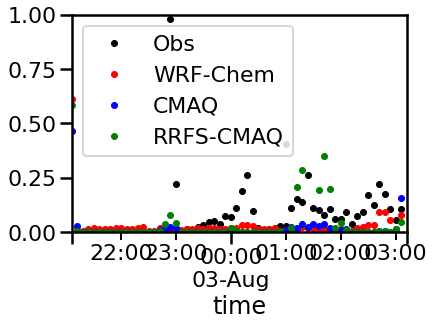

In [23]:
ax = df_wrf.plot(x='time',y='NO2_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='no2',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='NO2',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='no2',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
ax.set_ylim([0,1])

(0.0, 200.0)

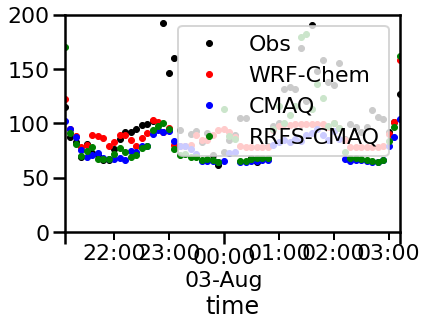

In [24]:
ax = df_wrf.plot(x='time',y='CO_LGR_ppb_PEISCHL',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='co',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='CO',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='co',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
ax.set_ylim([0,200])

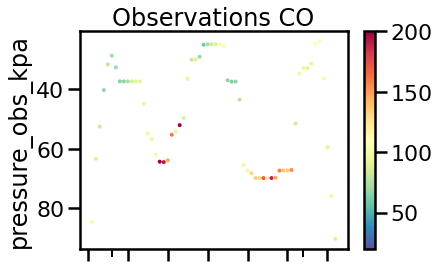

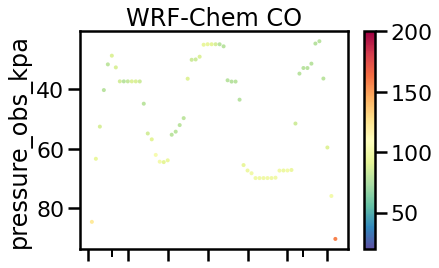

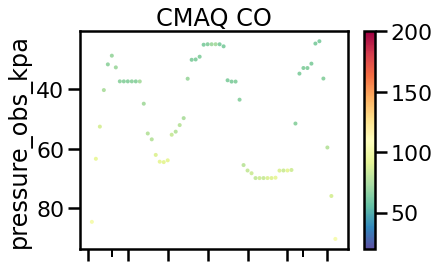

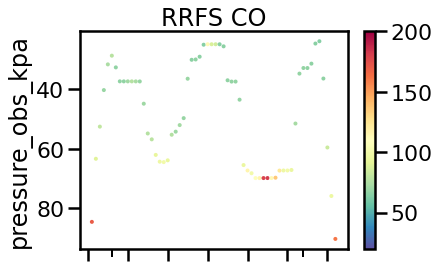

In [25]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['CO_LGR_ppb_PEISCHL'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['co'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['CO'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['co'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()

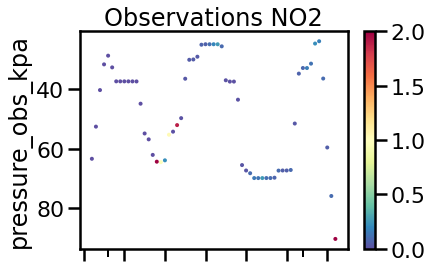

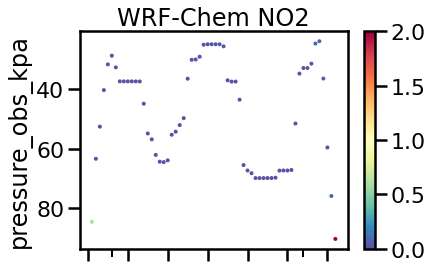

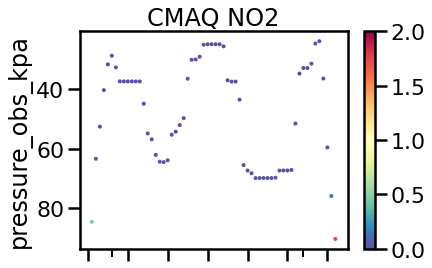

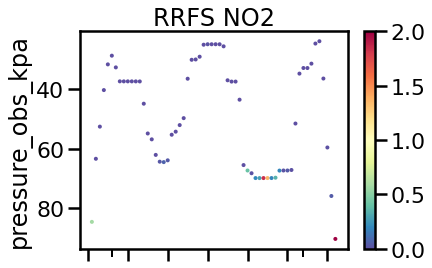

In [26]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['NO2_CL_RYERSON'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['no2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['NO2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['no2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()

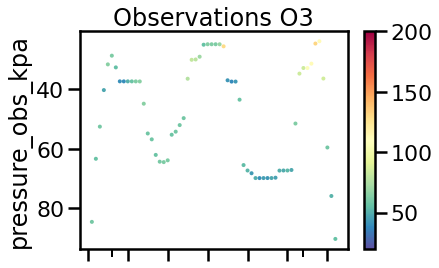

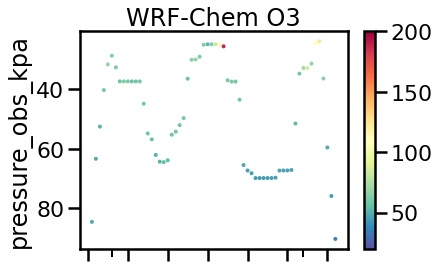

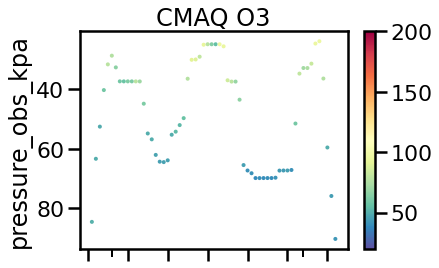

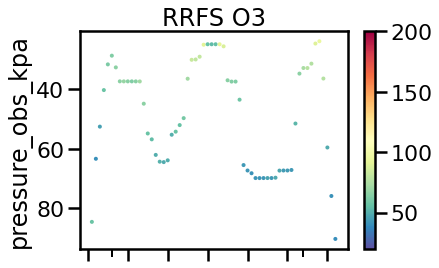

In [27]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['O3_CL_RYERSON'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['o3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['O3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['o3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()

In [28]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['o3'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'o3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  2.7s
[########################################] | 100% Completed |  2.7s
[########################################] | 100% Completed |  2.8s
[########################################] | 100% Completed |  2.9s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    o3                (x, z, y) float64 49.66 49.65 49.65 ... 83.36 85.81 88.41

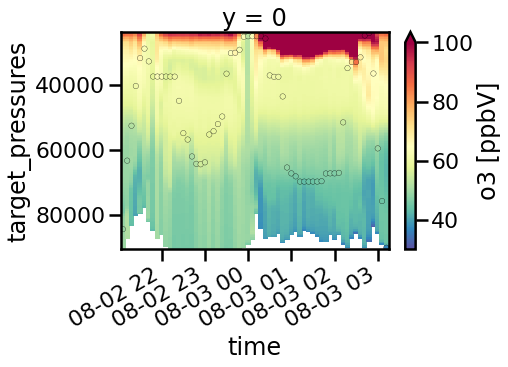

In [29]:
ax = ds_wrf_const['o3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['o3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

In [30]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['co'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'co'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  2.7s
[########################################] | 100% Completed |  2.8s
[########################################] | 100% Completed |  2.9s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    co                (x, z, y) float64 125.6 125.3 124.9 ... 78.3 78.24 78.16

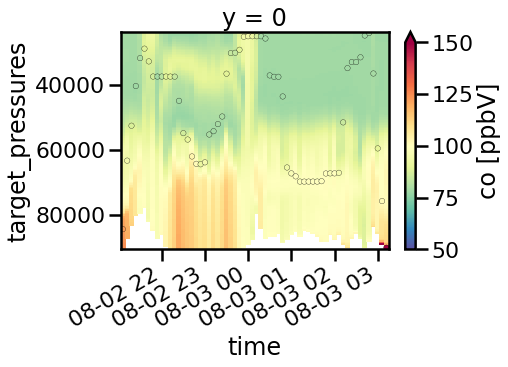

In [31]:
ax = ds_wrf_const['co'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['co'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

In [32]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['no2'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'no2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed |  2.6s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    no2               (x, z, y) float64 0.9656 0.9217 0.8817 ... 0.1064 0.1117

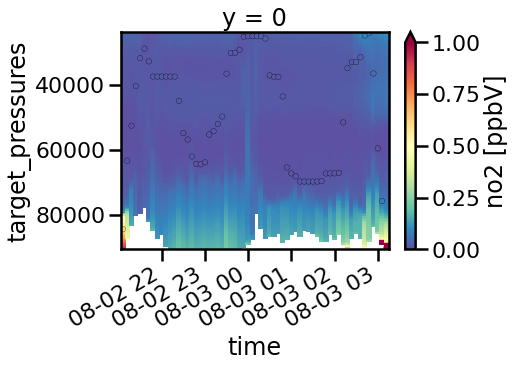

In [33]:
ax = ds_wrf_const['no2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['no2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)

[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.4s
[########################################] | 100% Completed |  5.5s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  6.4s
[########################################] | 100% Completed |  6.5s
[########################################] | 100% Completed |  6.6s


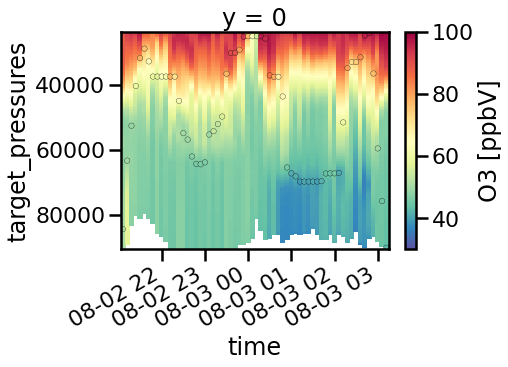

In [34]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['O3'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'O3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['O3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['O3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  6.4s


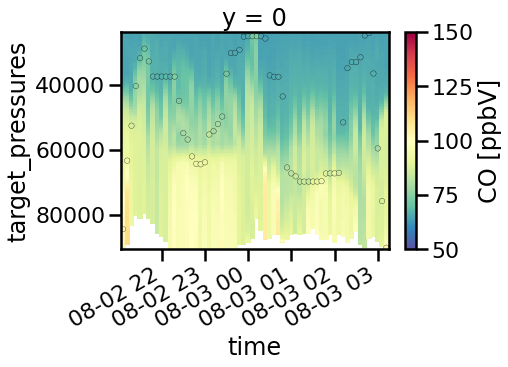

In [35]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['CO'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'CO'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['CO'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['CO'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.3s


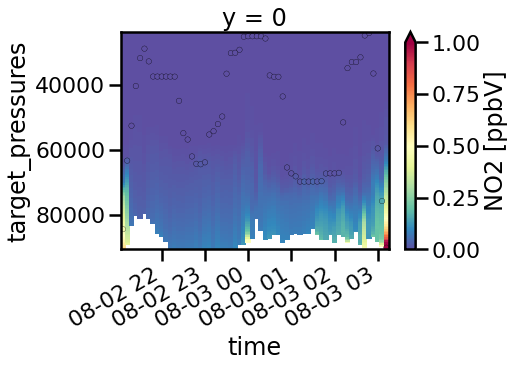

In [36]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['NO2'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'NO2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['NO2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['NO2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)

[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s


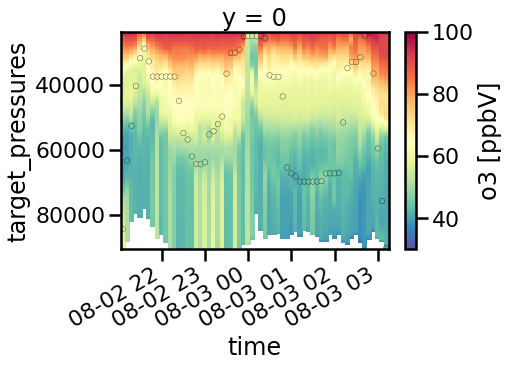

In [37]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['o3'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'o3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['o3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['o3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s


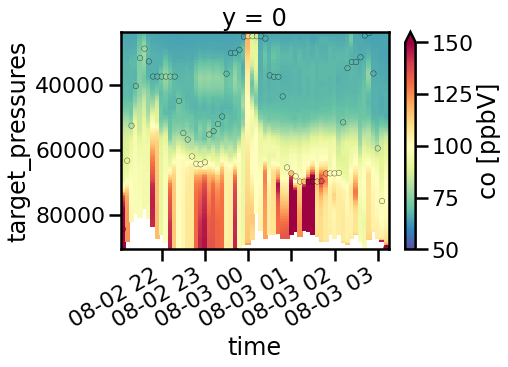

In [38]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['co'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'co'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['co'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['co'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.8s


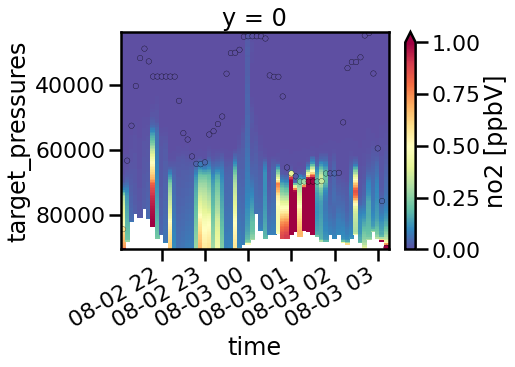

In [39]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['no2'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'no2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['no2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['no2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Static_Pressure_YANG']*100,label='SP')
plt.plot(df.index,df['pressure_obs'],label='P',linestyle='--')
plt.legend()

In [ ]:
plt.plot(df.index,df['Static_Pressure_YANG']*100/df['pressure_obs'])
#Differences in pressure are less than 0.5% so could use either of these.